In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv("E:\FULL STACK DATA SCIENCE & AI\Internship projects\house_price_train.csv")


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

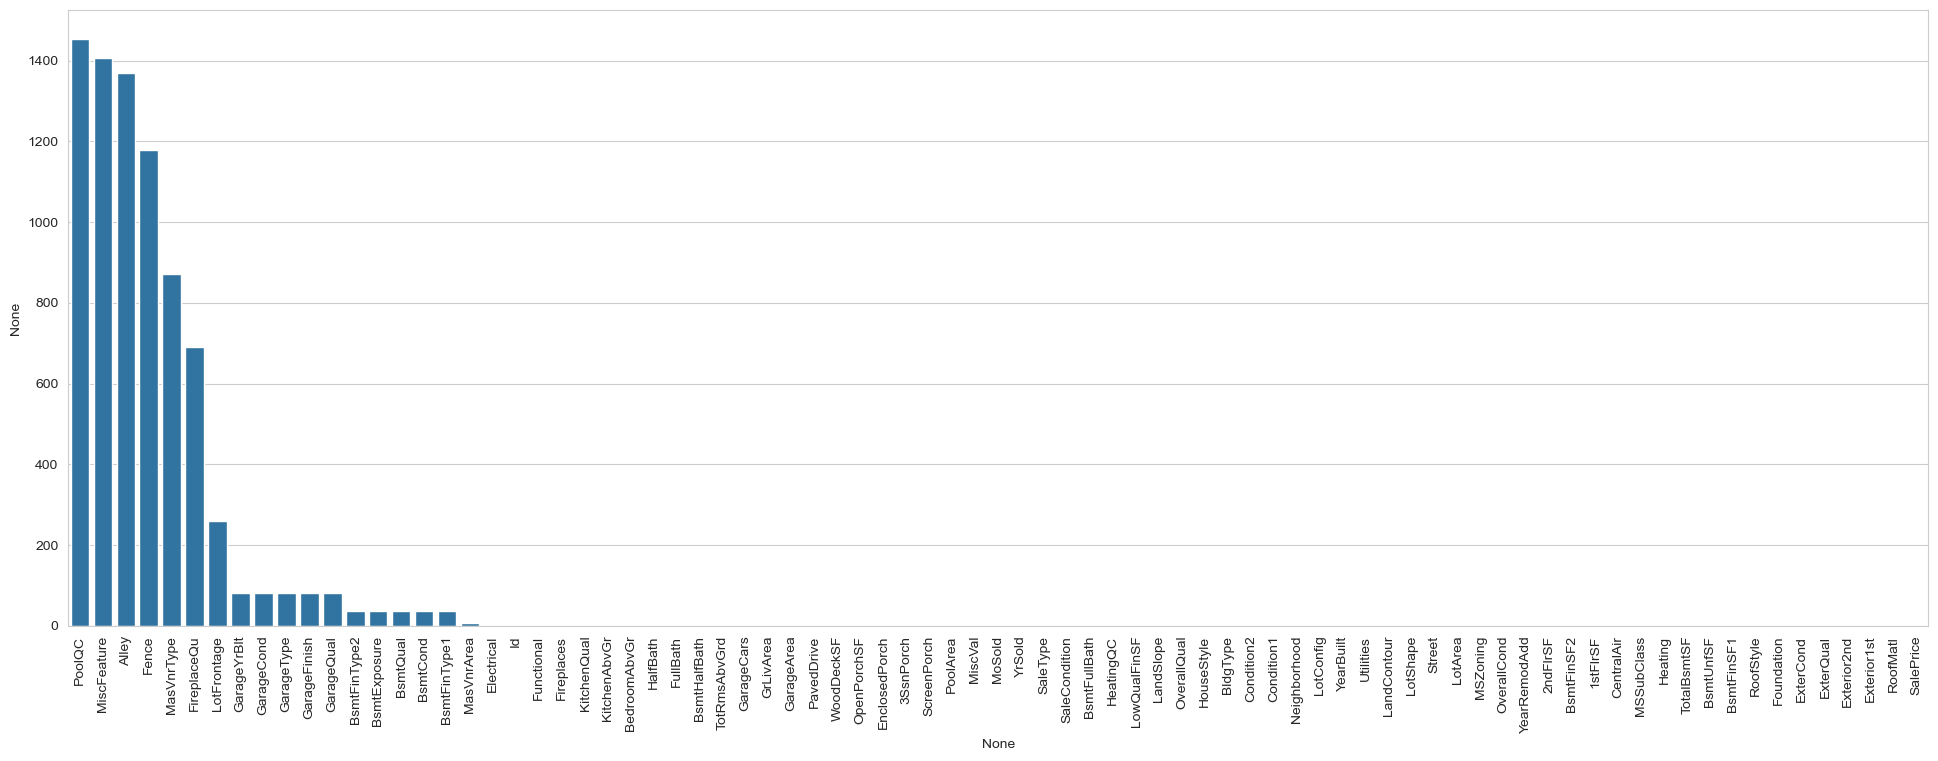

In [7]:
plt.figure(figsize=(24,8))
# columns with the most null values
cols_with_null=df.isnull().sum().sort_values(ascending=False)
# Let's visualize these columns
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show;

<Axes: >

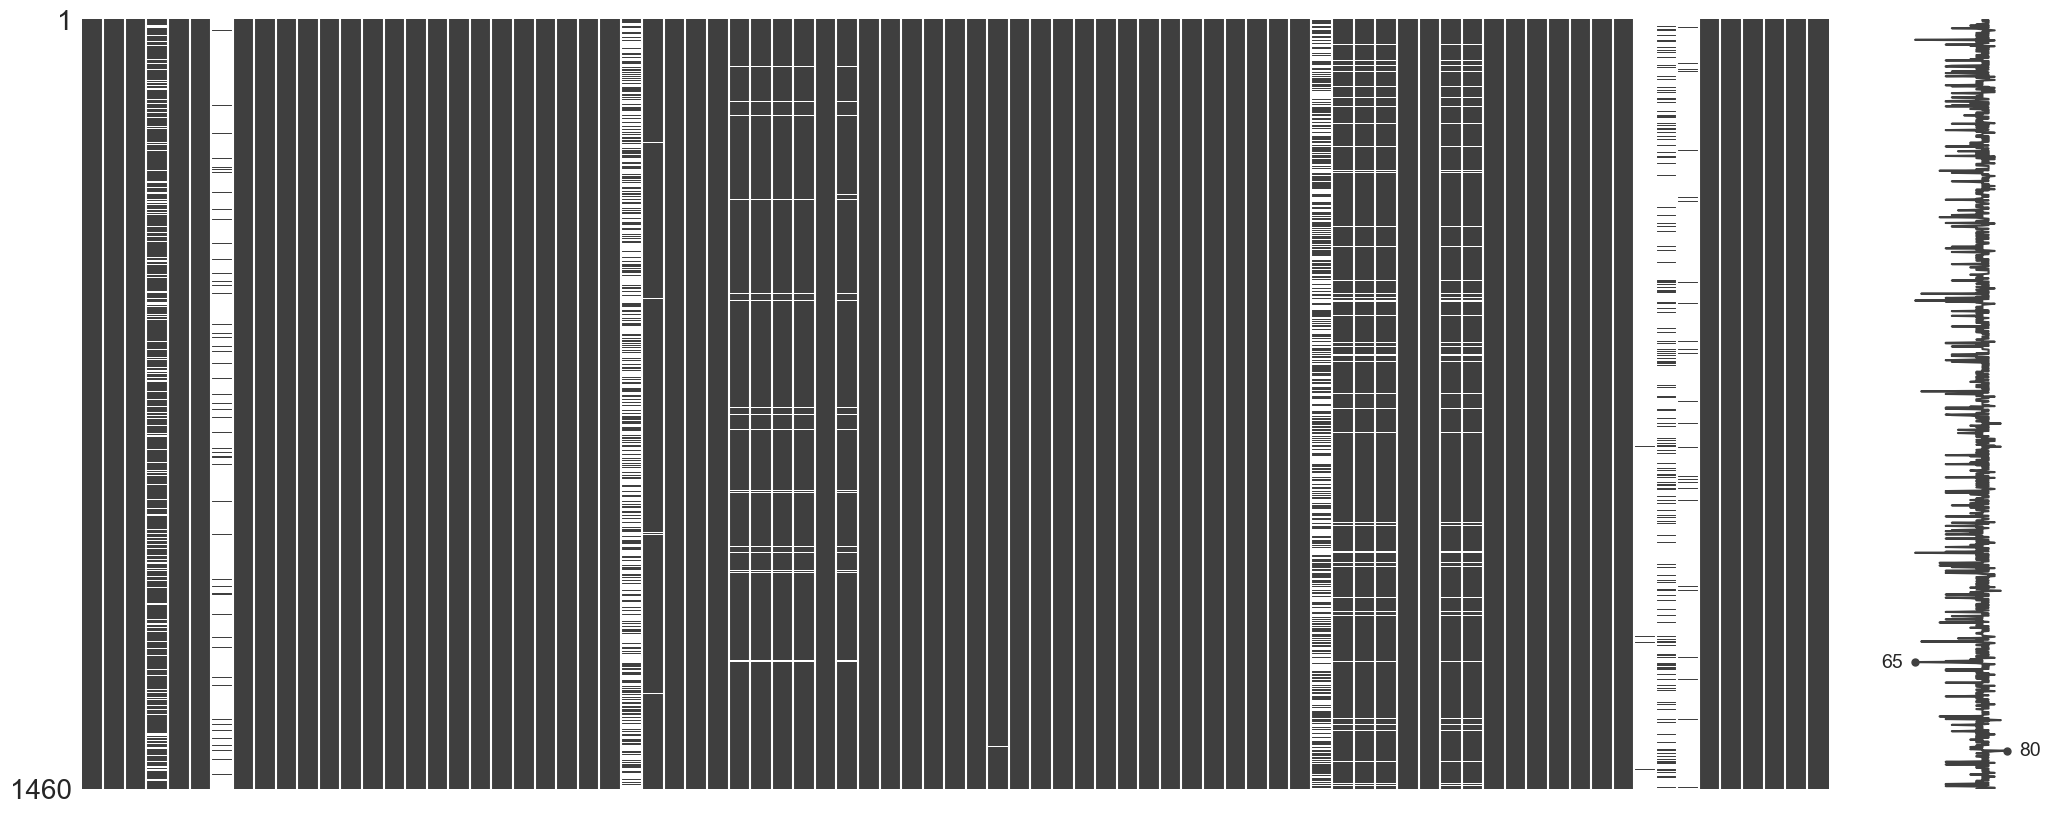

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df)


In [9]:
df['SalePrice'].isnull().sum()

0

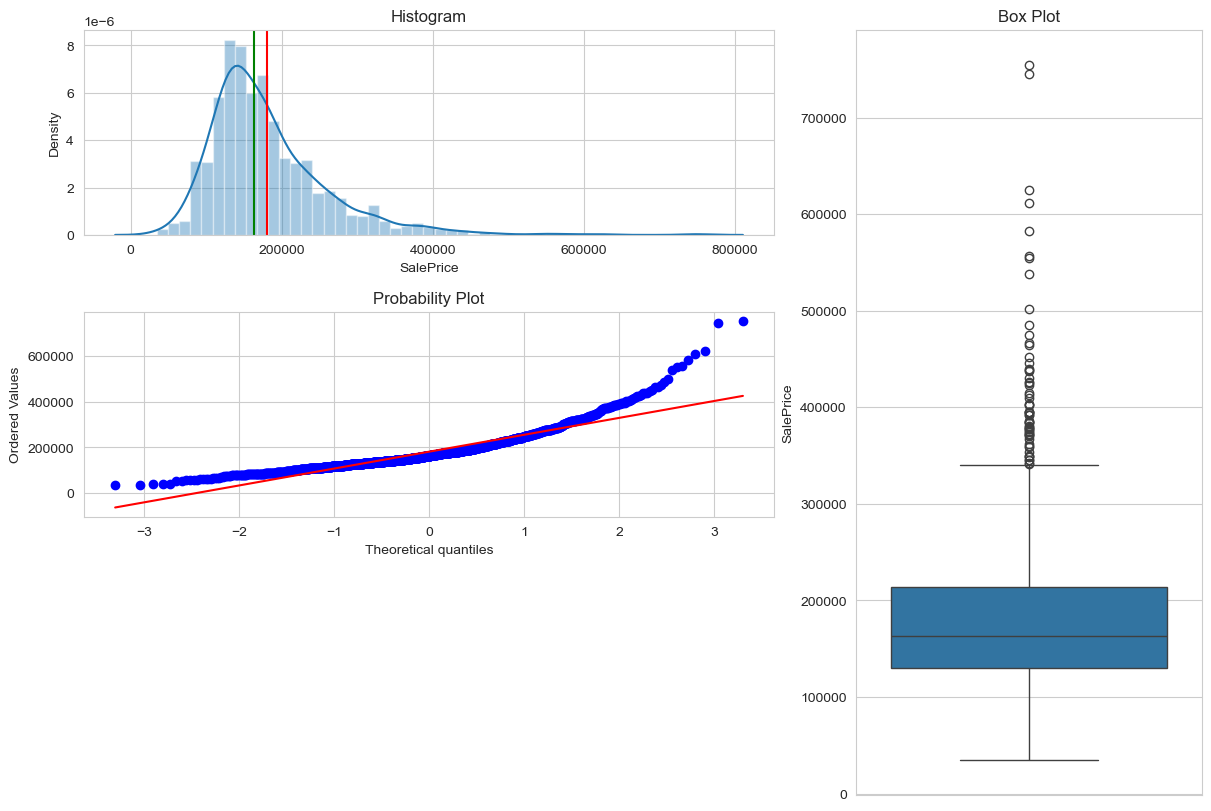

In [10]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')

In [11]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [12]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageYrBlt,81,5.547945
58,GarageType,81,5.547945
64,GarageCond,81,5.547945
3,LotFrontage,259,17.739726
57,FireplaceQu,690,47.260274
25,MasVnrType,872,59.726027
73,Fence,1179,80.753425
6,Alley,1369,93.767123
74,MiscFeature,1406,96.301370
72,PoolQC,1453,99.520548


In [13]:
df=df.drop(['PoolQC'],axis=1)
df=df.drop(['MiscFeature'],axis=1)
df=df.drop(['Alley'],axis=1)
df=df.drop(['Fence'],axis=1)
df=df.drop(['MasVnrType'],axis=1)
df=df.drop(['FireplaceQu'],axis=1)
# dropping unnessary columns from the dataset

In [15]:
#filling categorical and numerical columns by using most_frequent
for col in ['BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2','BsmtExposure','GarageQual','GarageCond','GarageFinish','GarageType','Electrical']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
for col in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
27,Foundation,0,0.0
26,ExterCond,0,0.0
25,ExterQual,0,0.0
24,MasVnrArea,0,0.0
23,Exterior2nd,0,0.0
22,Exterior1st,0,0.0
21,RoofMatl,0,0.0
20,RoofStyle,0,0.0
18,YearBuilt,0,0.0
74,SalePrice,0,0.0


In [17]:
important_features=['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
df[important_features].describe()
#We have added certain features which are quite intuitive and are taken into consideration in real life too while buying the house

,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


In [18]:
un_imp=['MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','3SsnPorch','YrSold','MoSold','MiscVal','PoolArea']
un_imp

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'YrSold',
 'MoSold',
 'MiscVal',
 'PoolArea']

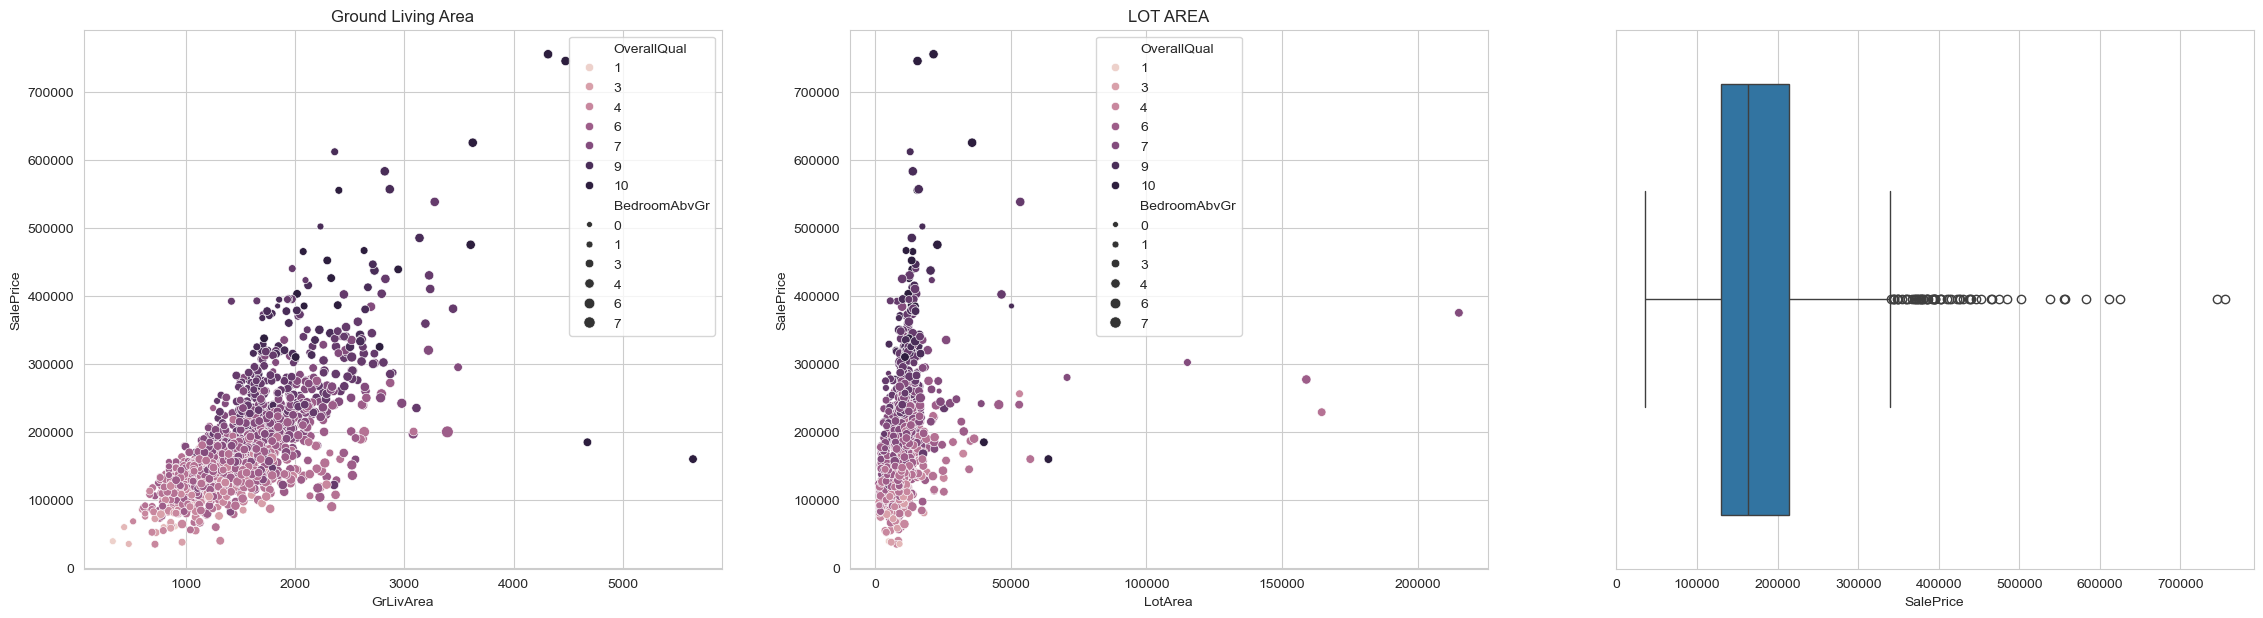

In [19]:
fig, ax=plt.subplots(1,3,figsize=(28,7))
sns.scatterplot(x=df.GrLivArea,y=df.SalePrice,size=df.BedroomAbvGr,hue=df.OverallQual, ax=ax[0])
ax[0].set_title("Ground Living Area")
sns.scatterplot(x=df.LotArea,y=df.SalePrice,size=df.BedroomAbvGr,hue=df.OverallQual, ax=ax[1])
ax[1].set_title("LOT AREA")
sns.boxplot(x=df.SalePrice);

by the above plot we can observe that,the houses which as more sale prices are good in quality and more no.of bedrooms are there

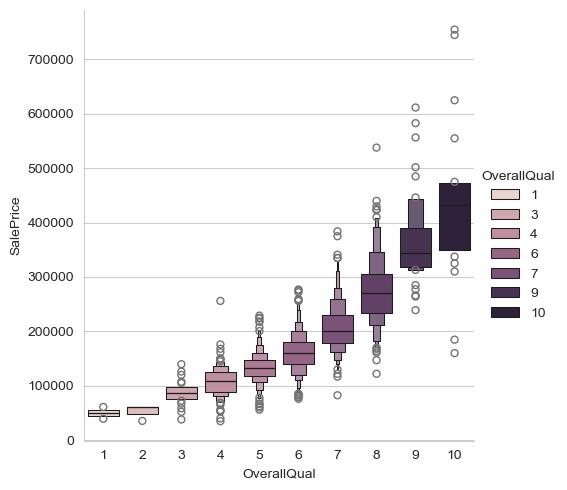

In [20]:
sns.catplot(data=df,y='SalePrice',x='OverallQual',hue='OverallQual',kind='boxen');

In [21]:
df['SalePrice'].quantile(0.995)

527331.9149999974

In [22]:
rows_2_drop=df[df['SalePrice']>df['SalePrice'].quantile(0.995)].index
df.drop(rows_2_drop,inplace=True)

In [23]:
df.shape

(1452, 75)

In [24]:
rows_2_drop=df[df['GrLivArea']>4000].index
df.drop(rows_2_drop,inplace=True)


In [25]:
df.shape

(1450, 75)

In [26]:
df[df['LotArea']>100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,60.0,159000,Pave,IR2,Low,AllPub,CulDSac,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,60.0,164660,Grvl,IR1,HLS,AllPub,Corner,...,0,0,0,0,700,8,2008,WD,Normal,228950
706,707,20,RL,60.0,115149,Pave,IR2,Low,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,302000


In [27]:
rows_2_drop=df[df['LotArea']>100000].index
df.drop(rows_2_drop,inplace=True)

In [28]:
df.shape

(1446, 75)

In [29]:
X = df.drop(['Id','SalePrice'],axis=1)
y = df.SalePrice


In [30]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [31]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1446, dtype: int64

In [32]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

In [33]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [34]:
from sklearn import preprocessing

for feature in categorical_cols:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])



In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1156, 73), (290, 73), (1156,), (290,))

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import pandas as pd
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Predictions', 'RMSE'])

# Define algorithms as a list of tuples containing the algorithm name and object
algorithms = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('KNeighbors Regressor', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor())
]

# Iterate over algorithms
for name, algorithm in algorithms:
    print(f"Training {name}...")
    
    # Train the algorithm
    algorithm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = algorithm.predict(X_test)
    
    # Calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store predictions and RMSE in the results DataFrame
    results.loc[name] = [y_pred, rmse]

# Display results
print(results)


Training Linear Regression...
Training Lasso Regression...
Training Ridge Regression...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training SVR...
Training KNeighbors Regressor...
Training XGBoost Regressor...
                                                                   Predictions  \
Linear Regression            [116867.56678770157, 336943.99398580176, 14541...   
Lasso Regression             [116870.25735745672, 336935.6901007306, 145402...   
Ridge Regression             [116830.72245570424, 337063.1641258247, 145903...   
Random Forest Regressor      [127431.5, 331588.41, 115146.18, 132207.0, 325...   
Gradient Boosting Regressor  [127995.51102478811, 322690.9519489046, 118337...   
SVR                          [162217.84103763432, 162307.2068575254, 162236...   
KNeighbors Regressor         [108500.0, 302209.8, 117360.0, 129300.0, 25820...   
XGBoost Regressor            [122650.016, 339365.94, 128014.44, 136845.98, ...   

                  